<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных." data-toc-modified-id="Шаг-1.-Обзор-данных.-1">Шаг 1. Обзор данных.</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных." data-toc-modified-id="Шаг-2.-Предобработка-данных.-2">Шаг 2. Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Шаг-2.1.-Приведение-данных-к-нужным-типам-и-проверка-их-на-дубликаты." data-toc-modified-id="Шаг-2.1.-Приведение-данных-к-нужным-типам-и-проверка-их-на-дубликаты.-2.1">Шаг 2.1. Приведение данных к нужным типам и проверка их на дубликаты.</a></span></li><li><span><a href="#Шаг-2.2.-Устранение-данных-искажающих-ход-анализа." data-toc-modified-id="Шаг-2.2.-Устранение-данных-искажающих-ход-анализа.-2.2">Шаг 2.2. Устранение данных искажающих ход анализа.</a></span></li><li><span><a href="#Шаг-2.3.-Создание-сводных-таблиц-по-услугам-оператора." data-toc-modified-id="Шаг-2.3.-Создание-сводных-таблиц-по-услугам-оператора.-2.3">Шаг 2.3. Создание сводных таблиц по услугам оператора.</a></span></li><li><span><a href="#Шаг-2.4.-Подсчет-итоговых-показателей-для-анализа." data-toc-modified-id="Шаг-2.4.-Подсчет-итоговых-показателей-для-анализа.-2.4">Шаг 2.4. Подсчет итоговых показателей для анализа.</a></span></li></ul></li><li><span><a href="#Шаг-3.-Анализ-поведения-клиентов." data-toc-modified-id="Шаг-3.-Анализ-поведения-клиентов.-3">Шаг 3. Анализ поведения клиентов.</a></span></li><li><span><a href="#Шаг-4.-Проверка-гипотез." data-toc-modified-id="Шаг-4.-Проверка-гипотез.-4">Шаг 4. Проверка гипотез.</a></span><ul class="toc-item"><li><span><a href="#Шаг-4.1.-Гипотеза-о-равенстве-средней-выручки-по-тарифам." data-toc-modified-id="Шаг-4.1.-Гипотеза-о-равенстве-средней-выручки-по-тарифам.-4.1">Шаг 4.1. Гипотеза о равенстве средней выручки по тарифам.</a></span></li><li><span><a href="#Шаг-4.2.-Гипотеза-о-равенстве-средней-выручки-по-городам." data-toc-modified-id="Шаг-4.2.-Гипотеза-о-равенстве-средней-выручки-по-городам.-4.2">Шаг 4.2. Гипотеза о равенстве средней выручки по городам.</a></span></li></ul></li><li><span><a href="#Шаг-5.-Итоги-исследования." data-toc-modified-id="Шаг-5.-Итоги-исследования.-5">Шаг 5. Итоги исследования.</a></span><ul class="toc-item"><li><span><a href="#Шаг-5.1.-Описание-хода-исследования." data-toc-modified-id="Шаг-5.1.-Описание-хода-исследования.-5.1">Шаг 5.1. Описание хода исследования.</a></span></li><li><span><a href="#Шаг-5.2.-Общий-вывод." data-toc-modified-id="Шаг-5.2.-Общий-вывод.-5.2">Шаг 5.2. Общий вывод.</a></span></li></ul></li></ul></div>

# Анализ тарифов оператора связи "Мегалайн". 

**"Мегалайн" - федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей "Мегалайн": ФИО клиента, место регистрации абонента, наименование тарифа, количество и длительность звонков, сообщений и объем интернет-траффика каждого из них за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод: какой тариф лучше.**

In [1]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy import stats as st


Bad key text.latex.preview in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qua

In [2]:
# чтение файлов с данными с применением конструкции try-except
try:
    df_calls = pd.read_csv('/Users/regki/Downloads/calls.csv')
    df_internet = pd.read_csv('/Users/regki/Downloads/internet.csv')
    df_messages = pd.read_csv('/Users/regki/Downloads/messages.csv')
    df_tariffs = pd.read_csv('/Users/regki/Downloads/tariffs.csv')
    df_users = pd.read_csv('/Users/regki/Downloads/users.csv')
except:    
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')

## Шаг 1. Обзор данных.

In [3]:
# вывод на экран верхней части таблицы со звонками
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# обзор данных со звонками
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице 202607 строк с данными(202607 звонков), есть пропущенные - длительностью в 0 секунд. 2 столбца данных строкового типа object, 1 столбец числового с плавающей точкой типа float, 1 целочисленного типа int. В данных пропусков нет.

In [5]:
# вывод на экран верхней части таблицы с интернет траффиком
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# обзор данных с интернет-траффиком
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице 149396 строк с данными(149396 интернет-сессий). 2 столбца данных строкового типа object, 1 столбец числового с плавающей точкой типа float, 2 целочисленного типа int. В данных пропусков нет.

In [7]:
# вывод на экран верхней части таблицы с сообщениями
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
# обзор данных с сообщениями
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице 123036 строк с данными(123036 сообщений). 2 столбца данных строкового типа object, 2 целочисленного типа int. В данных пропусков нет.

In [9]:
# вывод на экран верхней части таблицы с данными о тарифах
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Итак, из таблицы понятно, что клиенты оператора на тарифе "Смарт" оплачивают за пользование услугами связи 550 руб/мес постоянных расходов, которые покрывают 500 минут разговоров, 50 смс-сообщений и 15360 мб интернет-траффика. Те же пользователи тарифа "Смарт" при превышении пороговых значений оплачивают за 1 мин. разговора 3 руб/мин., за 1 сообщение руб, 200 руб/гигабайт. Клиенты на тарифе "Ультра" имеют 1950 руб. абонентской платы, которая включает 3000 мин разговоров, 30720 мегабайт траффика, 1000 сообщений. Сверх лимита пользователи "Ультра" оплачивают 1 руб/мин., 1руб/сообщение, 150 руб/Гигабайт интернета. Еще известно, что секунды звонков клиентов "Мегалайн" округляются в большую сторону до минут, а также мегабайты за месяц использования интернета округляются до целых гигабайт. Учтем эти ньюансы в дальнейшем исследовании.

In [10]:
# обзор данных по тарифам
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В данных по тарифам: 2 строки(2 тарифа) 1 столбец с данными типа object, 7 столбцов с целочисленными данными типа float.

In [11]:
# вывод на экран верхней части таблицы с данными о пользователях 
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
# обзор данных о пользователях
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В данных о пользователях 500 строк(500 пользователей). 6 столбцов с данными типа object, 2 столбца с данными типа int. В одном столбце много пропусков, это данные об дате отключения клиента от оператора связи. Оставим эти пропуски, не заполняя их.  

In [13]:
# вывод на экран части данных с заполненной датой отключения от оператора
df_users[~(df_users['churn_date'].isna())].head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


## Шаг 2. Предобработка данных.

### Шаг 2.1. Приведение данных к нужным типам и проверка их на дубликаты.

Обработаем данные, необходимые для анализа. Уберем лишнее, приведем данные к нужным типам и сведем их по пользователям в итоговые таблицы, чтобы провести исследовательский и статистический анализ.

In [14]:
# вывод на экран хвоста таблицы по интернет-траффику
df_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


В таблице с интернет-траффиком есть столбец "Unnamed:0", который судя по всему имеет данные идентичные наименованию индексов. Удалим лишний столбец.

In [15]:
# удаление столбца "Unnamed:0" методом drop
df_internet = df_internet.drop(columns='Unnamed: 0' , axis=0)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Приведем данные к необходимым для анализа форматам. В первую очередь округлим продолжительность разговоров в минутах до целых чисел в большую сторону.

In [16]:
# приведение продолжительности звонков к целочисленному формату методом astype, с применением метода np.ceil
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


В каждой таблице есть данные с датами, но в формате object. Переведем данные в формат даты методом pd.to_datetime.

In [17]:
# конвертация в формат даты данных о сессии интернет-соединения методом pd.to_datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'] , format='%Y-%m-%d')

In [18]:
# конвертация в формат даты данных о регистрации пользователя методом pd.to_datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'] , format='%Y-%m-%d')

In [19]:
# конвертация в формат даты данных об отключении пользователя от оператора связи методом pd.to_datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'] , format='%Y-%m-%d')

In [20]:
# конвертация в формат даты данных об сообщениях методом pd.to_datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'] , format='%Y-%m-%d')

In [21]:
# конвертация в формат даты данных об звонках методом pd.to_datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'] , format='%Y-%m-%d')

Выполним общий обзор некоторых важных данных, чтобы исключить или подтвердить присутвствие аномалий в датасетах.

In [22]:
# количество пропущенных звонков методом count
df_calls[df_calls['duration'] == 0]['duration'].count()

39613

In [23]:
# обзор продолжительности звонков методом describe
df_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [24]:
# обзор объема интернет-сессий методом describe
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [25]:
# обзор возраста клиентов методом describe
df_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

В данных по продолжительности звонков, объеме интернет-сессииях, возрасте клиентов аномальных значений не наблюдается. Посмотрим соотношение количества пользователей на обоих тарифах.

In [26]:
# обзор количества клиентов на каждом тарифе
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Большинство пользователей находится на тарифе "smart" - около 70 %, на тарифе "ultra" остальные 30 %. Проверим данные на явные дубликаты.

In [27]:
# проверка количества методом duplicated
df_users.duplicated().sum()

0

Явных дубликатов не обнаружено. Для исследования важны данные с наименованиями городов, проверим написание городов в соответствующем столбце, чтобы исключить написание одинаковых городов в разных регистрах.

In [28]:
# вывод уникальных значений наименования городов
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Шаг 2.2. Устранение данных искажающих ход анализа.

Данные по неполным месяцам использования услуг пользователями могут исказить ход анализа, поэтому будет целесообразно исключить  их из датасетов. У нас есть информация по дате подключения абонента к оператору связи и отключению некоторых пользователей. В эти месяцы они могли пользоваться тарифом неполный месяц. Получим данные месяца по звонкам, а также месяцев подключения и отключения от оператора. Для этого будем использовать метод dt.month. Проведем такие операции и по сообщениям и интернет-сессиям. 

In [29]:
# получение номеров месяца звонков
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [30]:
# получение номеров месяца подключения и отключения клиентов от оператора и запись их в новые столбцы
df_users['start'] = df_users['reg_date'].dt.month
df_users['end'] = df_users['churn_date'].dt.month.fillna(0).astype('int')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,start,end
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,0


In [31]:
# декомпозиция датасета с данными о пользователях и запись в новую переменную
df_users_st_end = df_users[['user_id', 'start', 'end']]

In [32]:
# соединение таблиц мет. merge с данными звонков и клиентских данных с номером месяца подключения и отключения от оператора
df_users_st_end_call = df_calls.merge(df_users_st_end, on='user_id', how='outer')
# вывод на экран строк с пропусками
df_users_st_end_call[df_users_st_end_call['month'].isna() == True]

,id,call_date,duration,user_id,month,start,end
202607,NaN,NaT,NaN,1091,NaN,5,0
202608,NaN,NaT,NaN,1106,NaN,4,0
202609,NaN,NaT,NaN,1128,NaN,12,12
202610,NaN,NaT,NaN,1231,NaN,5,0
202611,NaN,NaT,NaN,1328,NaN,10,0
202612,NaN,NaT,NaN,1371,NaN,12,12
202613,NaN,NaT,NaN,1473,NaN,8,0
202614,NaN,NaT,NaN,1489,NaN,8,0


In [33]:
# удаление строк с пропусками
df_users_st_end_call = df_users_st_end_call.dropna().reset_index(drop=True)

In [34]:
# приведение номера месяца звонка к целочисленному типу
df_users_st_end_call['month'] = df_users_st_end_call['month'].astype('int')

Заменим на "0" значения продолжительности звонков в месяц подключения и отключения клиентов от оператора.

In [35]:
# вывод на экран строк с непропущенной датой отключения для проверки дальнейших результатов
df_users.loc[df_users['churn_date'].isna() == False].head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,start,end
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,5,10
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,10,12
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,8,11
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,6,10
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,5,10
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart,4,10
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart,11,12
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra,4,12
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart,3,12
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart,3,12


In [36]:
# создание функции для замены значений услуг на 0 в месяц подключения и отключения от оператора
def fill_st_end_zero(data, fill_column):
    data.loc[(data['month'] == data['start']) |
                        (data['month'] == data['end']), fill_column] = 0
    return data

In [37]:
# замена значений продолжительности звонков на 0 в месяц подключения и отключения от оператора и проверка результата
df_users_st_end_call = fill_st_end_zero(df_users_st_end_call, 'duration')
df_users_st_end_call.loc[(df_users_st_end_call['user_id'] == 1063) & (df_users_st_end_call['month'] == 4)]

,id,call_date,duration,user_id,month,start,end
24471,1063_0,2018-04-28,0.0,1063,4,4,12
24481,1063_10,2018-04-14,0.0,1063,4,4,12
24507,1063_36,2018-04-26,0.0,1063,4,4,12
24508,1063_37,2018-04-25,0.0,1063,4,4,12
24530,1063_59,2018-04-24,0.0,1063,4,4,12
...,...,...,...,...,...,...,...
25352,1063_881,2018-04-30,0.0,1063,4,4,12
25367,1063_896,2018-04-29,0.0,1063,4,4,12
25368,1063_897,2018-04-17,0.0,1063,4,4,12
25384,1063_913,2018-04-16,0.0,1063,4,4,12


In [38]:
# получение месяца смс-сообщения клиента методом dt.month и запись результата в новый столбец
df_messages['month'] = df_messages['message_date'].dt.month

Чтобы было удобнее вести подсчет отправленных пользователем сообщений, а также записать нулевые данные в месяцы подключения и отключения пользователей, создадим столбец, куда будем записывать единицу, которая подтверждает отправленное сообщение, а ноль - сообщений нет.

In [39]:
# создание столбца-счетчика с сообщениями
df_messages['1_message'] = 1

In [40]:
# соединение мет. merge таблиц с данными о сообщениях и данными пользователей с месяцами подключения и отключения 
df_users_st_end_mes = df_messages.merge(df_users_st_end, on='user_id', how='outer')
df_users_st_end_mes.loc[df_users_st_end_mes['month'].isna() == True]

,id,message_date,user_id,month,1_message,start,end
123036,NaN,NaT,1001,NaN,NaN,11,0
123037,NaN,NaT,1006,NaN,NaN,2,0
123038,NaN,NaT,1010,NaN,NaN,8,0
123039,NaN,NaT,1017,NaN,NaN,5,0
123040,NaN,NaT,1024,NaN,NaN,10,0
...,...,...,...,...,...,...,...
123105,NaN,NaT,1462,NaN,NaN,10,0
123106,NaN,NaT,1466,NaN,NaN,2,0
123107,NaN,NaT,1469,NaN,NaN,7,0
123108,NaN,NaT,1479,NaN,NaN,7,0


In [41]:
df_users_st_end_mes

,id,message_date,user_id,month,1_message,start,end
0,1000_0,2018-06-27,1000,6.0,1.0,5,0
1,1000_1,2018-10-08,1000,10.0,1.0,5,0
2,1000_2,2018-08-04,1000,8.0,1.0,5,0
3,1000_3,2018-06-16,1000,6.0,1.0,5,0
4,1000_4,2018-12-05,1000,12.0,1.0,5,0
...,...,...,...,...,...,...,...
123105,NaN,NaT,1462,NaN,NaN,10,0
123106,NaN,NaT,1466,NaN,NaN,2,0
123107,NaN,NaT,1469,NaN,NaN,7,0
123108,NaN,NaT,1479,NaN,NaN,7,0


In [42]:
# удаление пропусков методом dropna
df_users_st_end_mes = df_users_st_end_mes.dropna().reset_index(drop=True)

In [43]:
# приведение к целочисленному типу данных
df_users_st_end_mes['month'] = df_users_st_end_mes['month'].astype('int')
df_users_st_end_mes['1_message'] = df_users_st_end_mes['1_message'].astype('int')

In [44]:
# замена на 0 данных об отправлении сообщений в месяцы подключения и отключения клиентов и проверка результата
df_users_st_end_mes = fill_st_end_zero(df_users_st_end_mes, '1_message')
df_users_st_end_mes.loc[(df_users_st_end_mes['user_id'] == 1019) & (df_users_st_end_mes['month'] == 10)]

,id,message_date,user_id,month,1_message,start,end
4706,1019_10,2018-10-01,1019,10,0,5,10
4707,1019_11,2018-10-04,1019,10,0,5,10
4742,1019_46,2018-10-03,1019,10,0,5,10
4765,1019_69,2018-10-02,1019,10,0,5,10
4784,1019_88,2018-10-03,1019,10,0,5,10
4786,1019_90,2018-10-01,1019,10,0,5,10
4798,1019_102,2018-10-03,1019,10,0,5,10
4801,1019_105,2018-10-03,1019,10,0,5,10


In [45]:
# сброс номеров индексов методом reset_index
df_users_st_end_mes.reset_index(drop=True).tail() 

,id,message_date,user_id,month,1_message,start,end
123031,1499_179,2018-12-12,1499,12,1,9,0
123032,1499_180,2018-09-28,1499,9,0,9,0
123033,1499_181,2018-09-27,1499,9,0,9,0
123034,1499_182,2018-11-15,1499,11,1,9,0
123035,1499_183,2018-11-16,1499,11,1,9,0


In [46]:
# получение номера месяца интернет-сессии и запись результата в новый столбец
df_internet['month'] = df_internet['session_date'].dt.month

In [47]:
# соединение мет. merge таблиц с интернет-сессиями и данными пользователей с месяцами подключения и отключения
df_users_st_end_int = df_internet.merge(df_users_st_end, on='user_id', how='outer')
df_users_st_end_int.loc[df_users_st_end_int['month'].isna() == True]

,id,mb_used,session_date,user_id,month,start,end
149396,NaN,NaN,NaT,1128,NaN,12,12
149397,NaN,NaN,NaT,1273,NaN,5,0
149398,NaN,NaN,NaT,1371,NaN,12,12


In [48]:
# сброс номеров индексов методом reset_index
df_users_st_end_int = df_users_st_end_int.dropna().reset_index(drop=True)
df_users_st_end_int

,id,mb_used,session_date,user_id,month,start,end
0,1000_0,112.95,2018-11-25,1000,11.0,5,0
1,1000_1,1052.81,2018-09-07,1000,9.0,5,0
2,1000_2,1197.26,2018-06-25,1000,6.0,5,0
3,1000_3,550.27,2018-08-22,1000,8.0,5,0
4,1000_4,302.56,2018-09-24,1000,9.0,5,0
...,...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10.0,9,0
149392,1499_153,490.13,2018-12-14,1499,12.0,9,0
149393,1499_154,0.00,2018-10-27,1499,10.0,9,0
149394,1499_155,1246.32,2018-11-26,1499,11.0,9,0


In [49]:
# замена данных об объеме траффика на 0 в месяцы подключения и отключения и проверка результата
df_users_st_end_int = fill_st_end_zero(df_users_st_end_int, 'mb_used')
df_users_st_end_int.loc[(df_users_st_end_int['user_id'] == 1063) & (df_users_st_end_int['month'] == 4)].head()

,id,mb_used,session_date,user_id,month,start,end
17988,1063_9,0.0,2018-04-12,1063,4.0,4,12
17993,1063_14,0.0,2018-04-16,1063,4.0,4,12
18009,1063_30,0.0,2018-04-25,1063,4.0,4,12
18016,1063_37,0.0,2018-04-15,1063,4.0,4,12
18025,1063_46,0.0,2018-04-16,1063,4.0,4,12


Итак, данные по неполным месяцам, которые могут исказить ход исследования исключили. Теперь необходимо свести данные об услугах оператора по каждому пользователю.

### Шаг 2.3. Создание сводных таблиц по услугам оператора.

In [50]:
# создание функции для сведения в таблицу данных по месяцам о об услугах по каждому пользователю
def pivot_serv_month(data, value):
    data_pivot = data.pivot_table(index='user_id', columns='month' , values=value , aggfunc='sum')
    data_pivot.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    data_pivot = data_pivot.fillna(0).astype('int')
    return data_pivot

In [51]:
# сведение в таблицу данных по месяцам о продолжительности звонков по каждому пользователю
df_calls_pivot = pivot_serv_month(df_users_st_end_call, 'duration')
df_calls_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,172,340,408,466,350,338,333
1001,0,0,0,0,0,0,0,0,0,0,0,414
1002,0,0,0,0,0,0,214,289,206,212,243,236
1003,0,0,0,0,0,0,0,0,961,855,824,802
1004,0,0,0,0,0,171,135,137,117,145,117,130


In [52]:
# сведение в таблицу данных по месяцам о количестве смс-сообщений по каждому пользователю
df_messages_pivot = pivot_serv_month(df_users_st_end_mes, '1_message')
df_messages_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,60,75,81,57,73,58,70
1002,0,0,0,0,0,0,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,0,91,83,94,75
1004,0,0,0,0,0,134,181,151,146,165,158,162
1005,0,38,56,41,42,47,56,64,52,44,51,54


In [53]:
# сведение в таблицу данных по месяцам об объеме интернет-траффика по каждому пользователю
df_internet_pivot = pivot_serv_month(df_users_st_end_int, 'mb_used')
df_internet_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,23233,14003,14055,14568,14702,14756,9817
1001,0,0,0,0,0,0,0,0,0,0,0,14036
1002,0,0,0,0,0,0,17580,20319,16691,13888,18587,18113
1003,0,0,0,0,0,0,0,0,12468,14768,11356,10121
1004,0,0,0,0,0,17600,22229,28584,15109,18475,15616,18021


В данных по тарифам указано, что использованный траффик за месяц округляется до гигабайтов в большую сторону. Переведем мегабайты в гигабайты и округлим результаты.

In [54]:
# перевод из мегабайтов в гигабайты
df_internet_pivot.loc[: , '1':'12'] = df_internet_pivot.loc[: , '1':'12'] / 1024

In [55]:
# округление интернет-траффика до целых чисел в большую сторону
df_internet_pivot = df_internet_pivot.apply(np.ceil).astype('int')
df_internet_pivot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,23,14,14,15,15,15,10
1001,0,0,0,0,0,0,0,0,0,0,0,14
1002,0,0,0,0,0,0,18,20,17,14,19,18
1003,0,0,0,0,0,0,0,0,13,15,12,10
1004,0,0,0,0,0,18,22,28,15,19,16,18


Анализ будем проводить по тарифам, поэтому добавим в датафреймы с услугами наименование тарифов.

In [56]:
# декомпозиция датафрейма с данными о пользователях
df_users_pivot = df_users[['user_id' , 'tariff']]
df_users_pivot.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


In [57]:
# создание функции для соединение мет. merge таблиц с наименованием тарифов и данными по услугам по клиентам и месяцам
def merge_serv_id(data_user, data_pivot):
    data_trf = data_user.merge(data_pivot , on='user_id', how='outer')
    data_trf = data_trf.fillna(0)
    data_trf.loc[:, '1':'12'] = data_trf.loc[:, '1':'12'].astype('int')
    return data_trf

In [58]:
# соединение мет. merge таблиц с наименованием тарифов и данными по продолжительности разговоров клиентов по месяцам
df_calls_trf = merge_serv_id(df_users_pivot, df_calls_pivot)
df_calls_trf.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,172,340,408,466,350,338,333
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,414
2,1002,smart,0,0,0,0,0,0,214,289,206,212,243,236
3,1003,ultra,0,0,0,0,0,0,0,0,961,855,824,802
4,1004,ultra,0,0,0,0,0,171,135,137,117,145,117,130


In [59]:
# соединение мет. merge таблиц с наименованием тарифов и данными по продолжительности разговоров клиентов по месяцам
df_messages_trf = merge_serv_id(df_users_pivot, df_messages_pivot)
df_messages_trf.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,60,75,81,57,73,58,70
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,11,13,4,10,16,12
3,1003,ultra,0,0,0,0,0,0,0,0,91,83,94,75
4,1004,ultra,0,0,0,0,0,134,181,151,146,165,158,162


In [60]:
# соединение мет. merge таблиц с наименованием тарифа и данными по объему интернет-траффика клиентов по месяцам
df_internet_trf = merge_serv_id(df_users_pivot, df_internet_pivot)
df_internet_trf.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,23,14,14,15,15,15,10
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,14
2,1002,smart,0,0,0,0,0,0,18,20,17,14,19,18
3,1003,ultra,0,0,0,0,0,0,0,0,13,15,12,10
4,1004,ultra,0,0,0,0,0,18,22,28,15,19,16,18


### Шаг 2.4. Подсчет итоговых показателей для анализа.

Создадим таблицы, в которых рассчитаем суммы по каждой услуге за использование тарифа сверх лимита абонентской платы.

In [61]:
# создание копии датасета с продолжительностью звонков по месяцам
df_calls_trf_ov = df_calls_trf.copy(deep=True)

In [62]:
# создание копии датасета с количеством сообщений по месяцам
df_messages_trf_ov = df_messages_trf.copy(deep=True)

In [63]:
# создание копии датасета с объемом интернет-траффика по месяцам
df_internet_trf_ov = df_internet_trf.copy(deep=True)

Создадим функцию для рассчета сумм за услуги сверх тарифного плана. 
- Принимает аргументами:
  - Датасет, в котором производится рассчет сумм сверх тарифа.
  - Суммы за лимиты по услуге за оба тарифа
  - Тарифы за превышение лимита по услугам
- Внутри функции:
  - Производится подсчет в двойном цикле выручки с пользователей за услуги связи сверх абонентской платы по месяцам. 
  - Для этого проитерируем каждую ячейку с данными о звонках, сообщениях, интернете с выполнением условий о превышении лимита по тарифам. 
  - При невыполнении условия о исчерпании лимита, вернем в ячейку "0". А при выполнении условия исчерпания лимита умножаем объем услуг сверх абонентской платы на тариф сверх лимита.
- Функция возвращает измененный датасет за каждый месяц с суммами превышения за пользование услугами сверх лимита по тарифам.

In [64]:
# создание функции для расчета сумм за израсходованные услуги сверх лимита по тарифам
def count_revenue(data, sum_ultra, trf_ultra, sum_smart, trf_smart):
    for i in range(500):
        for j in range(2,14):
            if data.iloc[i,1] == 'ultra' and data.iloc[i,j] > sum_ultra:
                data.iloc[i,j] = (data.iloc[i,j] - sum_ultra) * trf_ultra  
            elif data.iloc[i,1] == 'ultra' and data.iloc[i,j] <= sum_ultra:
                data.iloc[i,j] = 0
            elif (data.iloc[i,1] == 'smart') and data.iloc[i,j] > sum_smart:
                data.iloc[i,j] = (data.iloc[i,j] - sum_smart) * trf_smart
            elif data.iloc[i,1] == 'smart' and data.iloc[i,j] <= sum_smart:
                data.iloc[i,j] = 0
    return data

In [65]:
# вызов функции для расчета сумм за израсходованные минуты звонков сверх лимита по тарифам
df_calls_trf_ov = count_revenue(df_calls_trf_ov, 3000, 1, 500, 3)
df_calls_trf_ov

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,0,0,0,0,0,0
3,1003,ultra,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,ultra,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,0,0,0,0
496,1496,smart,0,282,171,63,0,165,246,81,0,0,486,54
497,1497,smart,0,0,0,0,0,0,0,0,0,0,0,135
498,1498,smart,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# вызов функции для расчета сумм за израсходованные смс-сообщения сверх лимита по тарифам
df_messages_trf_ov = count_revenue(df_messages_trf_ov, 1000, 1, 50, 3)
df_messages_trf_ov

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,0,0,0,0,0,0
3,1003,ultra,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,ultra,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,0,0,0,0
496,1496,smart,0,0,0,0,0,0,0,0,0,0,0,3
497,1497,smart,0,0,0,0,0,0,0,0,0,0,0,0
498,1498,smart,0,0,0,0,0,0,0,36,0,0,0,0


In [67]:
# вызов функции для расчета сумм за израсходованный интернет-траффик сверх лимита по тарифам
df_internet_trf_ov = count_revenue(df_internet_trf_ov, 30, 150, 15, 200)
df_internet_trf_ov

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,600,1000,400,0,800,600
3,1003,ultra,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,ultra,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,450,0,1350,0
496,1496,smart,0,2600,2000,1200,1800,1000,1800,1600,2400,2600,2000,1200
497,1497,smart,0,0,0,0,0,0,0,0,0,0,0,1000
498,1498,smart,0,0,0,0,0,0,0,1800,1400,0,0,0


Создадим датафрейм, который заполним данными об общей выручке с клиентов по месяцам с учетом абонентской платы и платежей свверх нее.

In [68]:
# создание копии датафрейма
df_total_revenue = df_calls_trf.copy(deep=True)
df_total_revenue

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,172,340,408,466,350,338,333
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,414
2,1002,smart,0,0,0,0,0,0,214,289,206,212,243,236
3,1003,ultra,0,0,0,0,0,0,0,0,961,855,824,802
4,1004,ultra,0,0,0,0,0,171,135,137,117,145,117,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,813,1030,954,1031
496,1496,smart,0,594,557,521,484,555,582,527,486,450,662,518
497,1497,smart,0,0,0,0,0,0,0,0,0,0,371,545
498,1498,smart,0,0,0,0,0,0,0,400,471,0,0,0


In [69]:
# обнуление значений датафрейма
df_total_revenue.loc[:,'1':'12'] = 0 
df_total_revenue

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,0,0,0,0,0,0
3,1003,ultra,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,ultra,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,0,0,0,0
496,1496,smart,0,0,0,0,0,0,0,0,0,0,0,0
497,1497,smart,0,0,0,0,0,0,0,0,0,0,0,0
498,1498,smart,0,0,0,0,0,0,0,0,0,0,0,0


Проитерируем каждую ячейку в таблицах с выполнением условий: если во всех таблицах с итоговыми объемами услуг по месяцам выходит "0", то записываем в ячейку с итоговым доходом "0". В других случаях, по каждому тарифу заносим в ячейку абонентскую плату плюс суммы за сверхлимитное пользование услугами из соответствующих таблиц. 

In [70]:
# подсчет общей выручки помесячно по каждому клиенту
for i in range(500):
    for j in range(2,14):
        if df_calls_trf.iloc[i,j] == 0 and df_messages_trf.iloc[i,j] == 0 and df_internet_trf.iloc[i,j] == 0:
            df_total_revenue.iloc[i,j] = 0
        elif df_total_revenue.iloc[i,1] == 'ultra':
            df_total_revenue.iloc[i,j] = 1950 + df_calls_trf_ov.iloc[i,j] + df_messages_trf_ov.iloc[i,j] + df_internet_trf_ov.iloc[i,j]
        elif df_total_revenue.iloc[i,1] == 'smart':
            df_total_revenue.iloc[i,j] = 550 + df_calls_trf_ov.iloc[i,j] + df_messages_trf_ov.iloc[i,j] + df_internet_trf_ov.iloc[i,j]
            
            

In [71]:
# вывод на экран таблицы с общей помесячной выручкой по каждому клиенту
df_total_revenue

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,550
2,1002,smart,0,0,0,0,0,0,1150,1550,950,550,1350,1150
3,1003,ultra,0,0,0,0,0,0,0,0,1950,1950,1950,1950
4,1004,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,2400,1950,3300,1950
496,1496,smart,0,3432,2721,1813,2350,1715,2596,2231,2950,3150,3036,1807
497,1497,smart,0,0,0,0,0,0,0,0,0,0,550,1685
498,1498,smart,0,0,0,0,0,0,0,2386,1950,0,0,0


Из данных видно, что некоторые клиенты пользовались своим тарифом весь год, а кто-то около месяца. Использовать такие данные для анализа некорректно. Рассчитаем помесячно по каждому пользователю средние показатели за год: длительность звонков, количество сообщений, объем интернет-траффика, средняя выручка с клиента. 

In [72]:
def mean_serv(data):
    data['mean'] = (data.iloc[:,2:14][~(data.iloc[:,2:14].isin([0]))]).sum(axis=1)/(data.iloc[:,2:14][~(data.iloc[:,2:14].isin([0]))]).count(axis=1)
    data['mean'] = data['mean'].fillna(0).astype('int')
    return data

In [73]:
# рассчет функции для рассчета средней длительности звонков для каждого пользователя
df_calls_trf = mean_serv(df_calls_trf)
df_calls_trf

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,0,0,0,0,0,172,340,408,466,350,338,333,343
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,414,414
2,1002,smart,0,0,0,0,0,0,214,289,206,212,243,236,233
3,1003,ultra,0,0,0,0,0,0,0,0,961,855,824,802,860
4,1004,ultra,0,0,0,0,0,171,135,137,117,145,117,130,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,813,1030,954,1031,957
496,1496,smart,0,594,557,521,484,555,582,527,486,450,662,518,539
497,1497,smart,0,0,0,0,0,0,0,0,0,0,371,545,458
498,1498,smart,0,0,0,0,0,0,0,400,471,0,0,0,435


In [74]:
# рассчет функции для рассчета среднего числа смс-сообщений для каждого пользователя
df_messages_trf = mean_serv(df_messages_trf)
df_messages_trf

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,0,0,0,0,0,60,75,81,57,73,58,70,67
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,0,0,0,0,0,0,11,13,4,10,16,12,11
3,1003,ultra,0,0,0,0,0,0,0,0,91,83,94,75,85
4,1004,ultra,0,0,0,0,0,134,181,151,146,165,158,162,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,82,82,79,84,81
496,1496,smart,0,45,46,49,40,35,42,41,29,35,46,51,41
497,1497,smart,0,0,0,0,0,0,0,0,0,0,14,17,15
498,1498,smart,0,0,0,0,0,0,0,62,44,0,0,0,53


In [75]:
# рассчет функции для рассчета среднего объема интернет-траффика для каждого пользователя
df_internet_trf = mean_serv(df_internet_trf)
df_internet_trf

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,0,0,0,0,0,23,14,14,15,15,15,10,15
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,14,14
2,1002,smart,0,0,0,0,0,0,18,20,17,14,19,18,17
3,1003,ultra,0,0,0,0,0,0,0,0,13,15,12,10,12
4,1004,ultra,0,0,0,0,0,18,22,28,15,19,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,33,29,39,23,31
496,1496,smart,0,28,25,21,24,20,24,23,27,28,25,21,24
497,1497,smart,0,0,0,0,0,0,0,0,0,0,14,20,17
498,1498,smart,0,0,0,0,0,0,0,24,22,0,0,0,23


In [76]:
# рассчет функции для рассчета среднего объема интернет-траффика для каждого пользователя
df_total_revenue = mean_serv(df_total_revenue)
df_total_revenue

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,1000,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,550,550
2,1002,smart,0,0,0,0,0,0,1150,1550,950,550,1350,1150,1116
3,1003,ultra,0,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,0,0,0,0,0,0,0,0,2400,1950,3300,1950,2400
496,1496,smart,0,3432,2721,1813,2350,1715,2596,2231,2950,3150,3036,1807,2527
497,1497,smart,0,0,0,0,0,0,0,0,0,0,550,1685,1117
498,1498,smart,0,0,0,0,0,0,0,2386,1950,0,0,0,2168


Для сравнителного анализа выручки клиентов из Москвы и других городов, присоединим методом merge из таблицы по клиентам колонку с наименованием города к таблице с помесячной и средней выручкой.

In [77]:
# декомпозиция датафрейма с клиентами
df_city = df_users[['user_id', 'city']]
df_city

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


In [78]:
# присоединение к датафрейму с выручкой по клиентам информации по городам
df_total_revenue_a = df_total_revenue.merge(df_city, on='user_id')
df_total_revenue_a.head(20)

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean,city
0,1000,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Краснодар
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,550,550,Москва
2,1002,smart,0,0,0,0,0,0,1150,1550,950,550,1350,1150,1116,Стерлитамак
3,1003,ultra,0,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,Москва
4,1004,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Новокузнецк
5,1005,smart,0,550,886,1186,835,886,775,949,556,1219,694,838,852,Набережные Челны
6,1006,smart,0,0,950,550,550,550,1550,1350,750,1550,550,1350,970,Ульяновск
7,1007,smart,0,0,0,0,1150,685,981,1750,1015,550,990,550,958,Москва
8,1008,smart,0,0,0,0,0,0,0,0,0,0,0,0,0,Челябинск
9,1009,smart,0,0,0,550,550,750,2550,2350,1950,1550,950,1350,1394,Пермь


Укрупним категории городов, оставим 2 категории: город "Москва" и "Провинция".

In [79]:
# создание категории "Провинция" в столбце с наименованием города при помощи метода where
df_total_revenue_a['city'] = df_total_revenue_a['city'].where(df_total_revenue_a['city'] == 'Москва', 'Провинция')
df_total_revenue_a.head(20)

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12,mean,city
0,1000,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Провинция
1,1001,smart,0,0,0,0,0,0,0,0,0,0,0,550,550,Москва
2,1002,smart,0,0,0,0,0,0,1150,1550,950,550,1350,1150,1116,Провинция
3,1003,ultra,0,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,Москва
4,1004,ultra,0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,Провинция
5,1005,smart,0,550,886,1186,835,886,775,949,556,1219,694,838,852,Провинция
6,1006,smart,0,0,950,550,550,550,1550,1350,750,1550,550,1350,970,Провинция
7,1007,smart,0,0,0,0,1150,685,981,1750,1015,550,990,550,958,Москва
8,1008,smart,0,0,0,0,0,0,0,0,0,0,0,0,0,Провинция
9,1009,smart,0,0,0,550,550,750,2550,2350,1950,1550,950,1350,1394,Провинция


## Шаг 3. Анализ поведения клиентов.

Построим гистограммы распределения средних параметров по пользователям тарифов "smart" и "ultra", а также вычислим основные статистические показатели по ним.

In [80]:
# создание функции для построения гистограммы распределения
def hist_serv(data, name_title, x_lab):
    data['mean'][(data['tariff'] == 'smart') & 
                     (data['mean'] != 0) ].hist(bins=50, alpha=0.3, rwidth=0.9, figsize=(12, 6), grid=True)
    data['mean'][(data['tariff'] == 'ultra') & 
                         (data['mean'] != 0) ].hist(bins=50, alpha=0.5, rwidth=0.9, figsize=(12, 6), grid=True)
    plt.title('распределение сред{}'.format(name_title), size=20)
    plt.xlabel(x_lab, size=15)
    plt.ylabel('частота', size=15)
    plt.legend(['smart', 'ultra'])

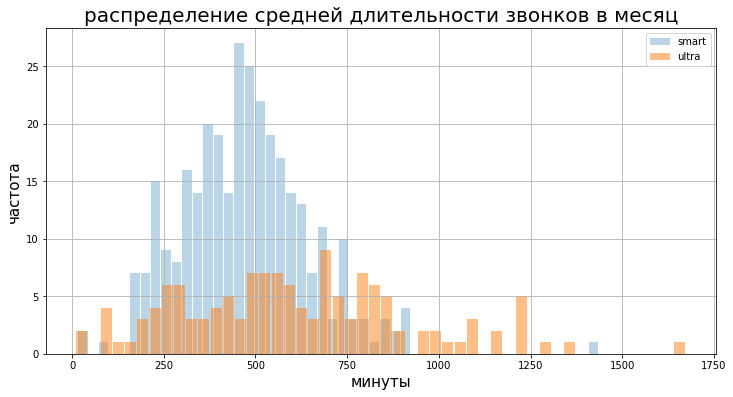

In [81]:
# вызов функции для построения гистограммы распределения по продолжительности звонков
hist_serv(df_calls_trf, 'ней длительности звонков в месяц', 'минуты')

Распределение длительности звонков на тарифе "smart" близкое к нормальному. Основная часть пользователей тарифа "smart" используют от 200 до 750 минут разговоров в месяц. В среднем длительность звонков составляет 473 минуты разговоров, что укладывается в лимит АП(абон. платы), именно максимальное число клиентов стараются израсходовать почти все включенные в АП минуты более дешевого тарифа. Распределение длительности звонков клиентов на тарифе "ultra" несколько больше растянуто по оси X. У них средние звонки в районе 600 минут, но дастаточно много разговаривают до 1000 минут и более. Но в отличие от дешевого тарифа, все клиенты выборки укладываются в лимит звонков по АП. 

In [82]:
# создание функции для расчета среднего размера услуг в месяц по тарифам
def mean_serv_tar(data, name_mean):
    print('Средн{} в месяц у клиентов на тарифе смарт: {:.0f}.'.format(name_mean, (data['mean']
                                        [(data['tariff'] == 'smart') & (data['mean'] != 0) ]).mean()))
    print('Средн{} в месяц у клиентов на тарифе ультра: {:.0f}.'.format(name_mean, 
                            (data['mean'][(data['tariff'] == 'ultra') & (data['mean'] != 0) ]).mean()))

In [83]:
# вызов функции для рассчета средней продолжительности звонков вмесяц
mean_serv_tar(df_calls_trf, 'яя продолжительность звонков')

Средняя продолжительность звонков в месяц у клиентов на тарифе смарт: 473.
Средняя продолжительность звонков в месяц у клиентов на тарифе ультра: 610.


In [84]:
# создание функции для расчета дисперсии среднего размера услуг в месяц по тарифам
def disper_serv_tar(data, name_disp):
    variance_smart = np.var((data['mean'][(data['tariff'] == 'smart') & 
                                                   (data['mean'] != 0)]), ddof=1)
    print('Дисперсия по {} в месяц у клиентов на тарифе смарт: {:.2f}'.format(name_disp, variance_smart))
    variance_ultra = np.var((data['mean'][(data['tariff'] == 'ultra') & 
                                                   (data['mean'] != 0)]), ddof=1)
    print('Дисперсия по {} в месяц у клиентов на тарифе ультра: {:.2f}'.format(name_disp, variance_ultra))

In [85]:
# вызов функции для рассчета дисперсии по продолжительности звонков вмесяц
disper_serv_tar(df_calls_trf, 'продолжительности звонков',)

Дисперсия по продолжительности звонков в месяц у клиентов на тарифе смарт: 31345.14
Дисперсия по продолжительности звонков в месяц у клиентов на тарифе ультра: 97427.91


In [86]:
# создание функции для расчета стандартного отклонения среднего размера услуг в месяц по тарифам
def std_serv_tar(data, name_std):
    std_dev_smart = np.std((data['mean'][(data['tariff'] == 'smart') & 
                                                   (data['mean'] != 0)]), ddof=1)
    print('Стандартное отклонение по {} в месяц у клиентов на тарифе смарт: {:.2f}'
      .format(name_std, std_dev_smart))
    std_dev_ultra = np.std((data['mean'][(data['tariff'] == 'ultra') & 
                                                   (data['mean'] != 0)]), ddof=1)
    print('Стандартное отклонение по {} в месяц у клиентов на тарифе ультра: {:.2f}'
      .format(name_std, std_dev_ultra))

In [87]:
# вызов функции для рассчета стандартного отклонения по продолжительности звонков вмесяц
std_serv_tar(df_calls_trf, 'продолжительности звонков',)

Стандартное отклонение по продолжительности звонков в месяц у клиентов на тарифе смарт: 177.05
Стандартное отклонение по продолжительности звонков в месяц у клиентов на тарифе ультра: 312.13


Как видим, статистические показатели по двум тарифам в категории длительности звонков отличаются существенно, разница в средней продолжительности около 20 %, а стандартное отклонение более чем на 40 %. Это можно объяснить отчасти значительно большей свободой абонентов на тарифе "ultra", где они даже не выходят за лимиты тарифа, и наоборот низким лимитом на звонки  абонентов тарифа "smart".

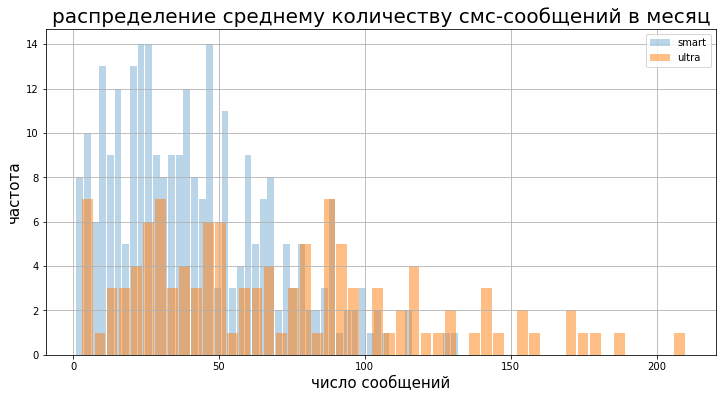

In [88]:
# вызов функции для построения гистограммы распределения по количеству сообщений
hist_serv(df_messages_trf, 'нему количеству смс-сообщений в месяц', 'число сообщений')

Распределение среднего количества сообщений в месяц по абонентам смещено влево к меньшему числу. У абонентов тарифа "smart" наблюдаются пики распределения в районе от нуля до примерно 30 сообщений, а также в районе лимита АП, как и у звонков, редко клиенты дешевого тарифа пересылают более 100 сообщений в месяц. Количество сообщений пересылаемых абонентами "ultra" также в редких случаях переваливает за 100, но очень редко отсылают до 200 сообщений, хотя среднее количество сообщений почти в 2 раза больше чем у клиентов "smart" Опять таки сказывается высокий порог лимита по АП на дорогом тарифе, при этом использование сообщений по-полной не наблюдается, что скорее всего объясняется более удобными альтернативами использования интернет-мессенджеров.

In [89]:
# вызов функции для рассчета среднего количества сообщений вмесяц
mean_serv_tar(df_messages_trf, 'ее количество сообщений',)

Среднее количество сообщений в месяц у клиентов на тарифе смарт: 42.
Среднее количество сообщений в месяц у клиентов на тарифе ультра: 71.


In [90]:
# вызов функции для рассчета дисперсии по среднему количеству сообщений вмесяц
disper_serv_tar(df_messages_trf, 'количеству сообщений',)

Дисперсия по количеству сообщений в месяц у клиентов на тарифе смарт: 769.84
Дисперсия по количеству сообщений в месяц у клиентов на тарифе ультра: 2267.62


In [91]:
# вызов функции для рассчета стандартного отклонения по среднему количеству сообщений вмесяц
std_serv_tar(df_messages_trf, 'количеству сообщений',)

Стандартное отклонение по количеству сообщений в месяц у клиентов на тарифе смарт: 27.75
Стандартное отклонение по количеству сообщений в месяц у клиентов на тарифе ультра: 47.62


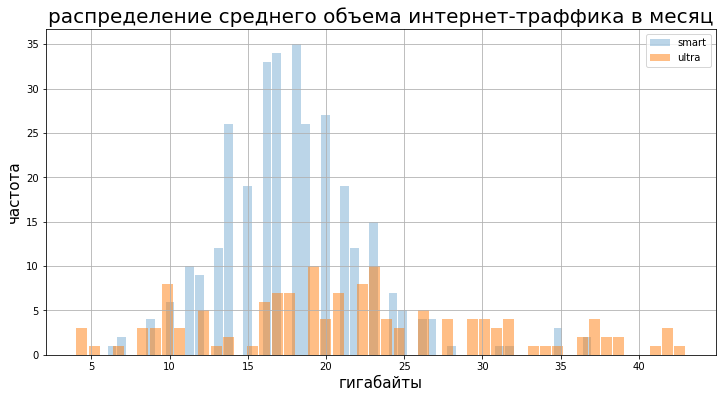

In [92]:
# вызов функции для построения гистограммы распределения по объему интернет-траффика
hist_serv(df_internet_trf, 'него объема интернет-траффика в месяц', 'гигабайты')

Распределение объема интернет-траффика по обоим тарифам близко к симметричному, но с некоторыми пропусками, скорее всего сказывается округление объема до целого числа гигабайт. В отличие от звонков и сообщений основная доля абонентов на "smart"использует интернет сверх лимита АП. Более высокий лимит на тарифе "ultra" позволяет более редко выходить клиенту за пределы лимита АП. Но случаи превышения лимита траффика на дорогом тарифе нередки. Средний объем траффика на обоих тарифах отличается примерно на 20 %.  Но разброс данных в разы больше у абонентов "ultra". 

In [93]:
# вызов функции для рассчета среднего объема интернет-траффика вмесяц
mean_serv_tar(df_internet_trf, 'ий объем интернет-траффика',)

Средний объем интернет-траффика в месяц у клиентов на тарифе смарт: 18.
Средний объем интернет-траффика в месяц у клиентов на тарифе ультра: 22.


In [94]:
# вызов функции для рассчета дисперсии по среднему объему интернет-траффика вмесяц
disper_serv_tar(df_internet_trf, 'объему интернет-траффика',)

Дисперсия по объему интернет-траффика в месяц у клиентов на тарифе смарт: 21.96
Дисперсия по объему интернет-траффика в месяц у клиентов на тарифе ультра: 84.43


In [95]:
# вызов функции для рассчета стандартного отклонения по среднему объему интернет-траффика вмесяц
std_serv_tar(df_internet_trf, 'объему интернет-траффика',)

Стандартное отклонение по объему интернет-траффика в месяц у клиентов на тарифе смарт: 4.69
Стандартное отклонение по объему интернет-траффика в месяц у клиентов на тарифе ультра: 9.19


Выполним обзор и анализ распределения данных помесячной выручки с абонентов  по тарифам и сравним распределение в столице и регионах.

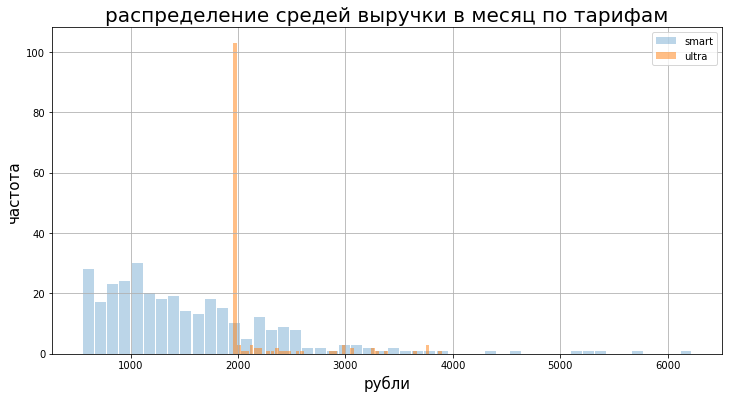

In [96]:
# вызов функции для построения гистограммы распределения по выручке в месяц
hist_serv(df_total_revenue_a, 'ей выручки в месяц по тарифам', 'рубли')

Как видим, данные по месячной выручке с обоих тарифов имеют неравномерное распределение и левое смещение в сторону меньших значений. Минимальные выручки у всех клиентов каждого из тарифов одинаковые и обусловлены обязательной АП. Но как видно из графика, клиенты тарифа "smart" очень часто тратят на связь гораздо больше размера АП, даже в редких случаях больше, чем абоненты "ultra". Такое положение дел можно объяснить низкими порогами лимитов на связь и высокими сверхлимитными тарифами. Абоненты "ultra" напротив, крайне редко тратят больше, чем размер АП, а при превышении порога тратят в три раза меньше на связь, чем при такой ситуации клиенты тарифа "smart". Выходит тариф "smart" не такой уж и дешевый.

In [97]:
# вызов функции для рассчета средней выручки у клиентов вмесяц
mean_serv_tar(df_total_revenue_a, 'яя выручка',)

Средняя выручка в месяц у клиентов на тарифе смарт: 1557.
Средняя выручка в месяц у клиентов на тарифе ультра: 2149.


In [98]:
# вызов функции для рассчета дисперсии по среднеей выручке у клиентов вмесяц
disper_serv_tar(df_total_revenue_a, 'средней выручке',)

Дисперсия по средней выручке в месяц у клиентов на тарифе смарт: 795077.10
Дисперсия по средней выручке в месяц у клиентов на тарифе ультра: 201676.99


In [99]:
# вызов функции для рассчета стандартного отклонения по средней выручке у клиентов вмесяц
std_serv_tar(df_total_revenue_a, 'средней выручке',)

Стандартное отклонение по средней выручке в месяц у клиентов на тарифе смарт: 891.67
Стандартное отклонение по средней выручке в месяц у клиентов на тарифе ультра: 449.08


Из расчетов понятно, что разброс в данных по тарифу "smart" в два раза больше, чем на втором тарифе. Пользователи "smart" часто выходят за рамки лимитов АП, а тарифы при этом в 3 раза дороже, чем на "ultra". Сравним распределение выручки в Москве и в Провинции.

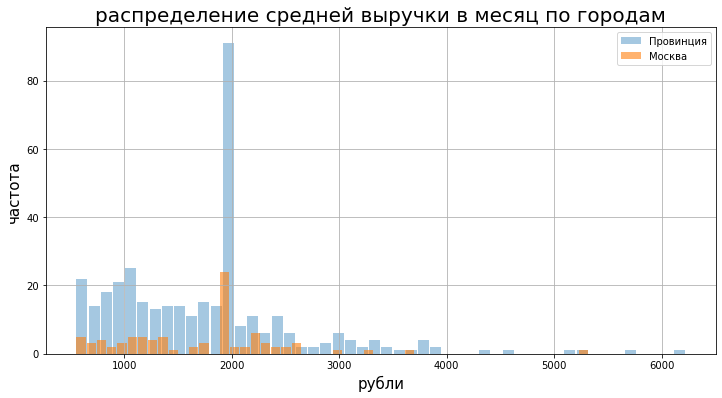

In [100]:
# построение гистрограммы распределения средней выручки с клиентов в Москве и в Провинции
df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Провинция') & 
                     (df_total_revenue_a['mean'] != 0) ].hist(bins=50, alpha=0.4, rwidth=0.9, figsize=(12, 6), grid=True)
df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Москва') & 
                     (df_total_revenue_a['mean'] != 0) ].hist(bins=50, alpha=0.6, rwidth=0.9, figsize=(12, 6), grid=True)
plt.title('распределение средней выручки в месяц по городам', size=20)
plt.xlabel('рубли', size=15)
plt.ylabel('частота', size=15)
plt.legend(['Провинция', 'Москва'])

Исходя из графика распределение данных среднемесячной выручки в Москве и Провинции выглядит похожим образом и смещено влево. Выделяются данные на отметке около 2000 руб. - в основном это выручка с АП по тарифу "ultra". **Проверим далее гипотезы о равенстве выручки с каждого клиента по тарифам и ее равенстве в Москве и регионах.** 

In [101]:
# расчет средней выручки с клиентов в месяц в Москве и Провинции
print('Средняя выручка у клиентов в Москве: {:.0f} рублей.'.format((df_total_revenue_a['mean']
                             [(df_total_revenue_a['city'] == 'Москва') & (df_total_revenue_a['mean'] != 0) ]).mean()))
print('Средняя выручка в месяц у клиентов в Провинции: {:.0f} рублей.'.format((df_total_revenue_a['mean']
                            [(df_total_revenue_a['city'] == 'Провинция') & (df_total_revenue_a['mean'] != 0) ]).mean()))

Средняя выручка у клиентов в Москве: 1709 рублей.
Средняя выручка в месяц у клиентов в Провинции: 1745 рублей.


In [102]:
# расчет дисперсии по среднемесячной выручке с клиентов в Москве и Провинции
variance_revenue_city_msk = np.var((df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Москва') & 
                                                   (df_total_revenue_a['mean'] != 0)]), ddof=1)
print('Дисперсия по средней выручке в месяц у клиентов из Москвы: {:.0f}'.format(variance_revenue_city_msk))
variance_revenue_city_prv = np.var((df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Провинция') & 
                                                   (df_total_revenue_a['mean'] != 0)]), ddof=1)
print('Дисперсия по средней выручке в месяц у клиентов из Провинции: {:.0f}'.format(variance_revenue_city_prv))

Дисперсия по средней выручке в месяц у клиентов из Москвы: 568164
Дисперсия по средней выручке в месяц у клиентов из Провинции: 717985


In [103]:
# расчет стандартного отклонения по средней месячной выручке с клиентов в Москве и Провинции
std_dev_revenue_city_msk = np.std((df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Москва') & 
                                                   (df_total_revenue_a['mean'] != 0)]), ddof=1)
print('Стандартное отклонение по выручке у клиентов из Москвы: {:.2f}'
      .format(std_dev_revenue_city_msk))
std_dev_revenue_city_prv = np.std((df_total_revenue_a['mean'][(df_total_revenue_a['city'] == 'Провинция') & 
                                                   (df_total_revenue_a['mean'] != 0)]), ddof=1)
print('Стандартное отклонение по выручке у клиентов из Провинции: {:.2f}'
      .format(std_dev_revenue_city_prv))

Стандартное отклонение по выручке у клиентов из Москвы: 753.77
Стандартное отклонение по выручке у клиентов из Провинции: 847.34


## Шаг 4. Проверка гипотез.

### Шаг 4.1. Гипотеза о равенстве средней выручки по тарифам.

Нулевую гипотезу обычно формулируют исходя из равенства значений сравниваемых совокупных выборок. Поэтому сформулируем нулевую гипотезу следующим образом:

**Проверка первой гипотезы. H0: средняя выручка пользователей тарифов "smart" и "ultra" равны.**
Альтернативную гипотезу сформулируем как двухстороннюю:
**Н1: средняя выручка пользователей тарифов "smart" и "ultra" различаются.**
Для того, чтобы отвергнуть или подтвердить гипотезу по 2-м выборкам будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, то есть двухсторонний ttest методом scipy.stats.ttest_ind(array1, array2, equal_var). Дисперсии распределения у тарифов сильно отличаются, поэтому укажем параметр equal_var=False. Предварительно запишем массивы выборок по тарифам в отдельные переменные. Определим параметр значимости alpha = 0.05.

In [104]:
# запись данных по среднемесячной выручке абонентов в переменные
smart_revenue = df_total_revenue_a[df_total_revenue_a['tariff'] == 'smart']
smart_revenue = smart_revenue.iloc[:,2:14]
ultra_revenue = df_total_revenue_a[df_total_revenue_a['tariff'] == 'ultra']
ultra_revenue = ultra_revenue.iloc[:,2:14]

In [105]:
# конвертация датафрейма данных с тарифом "smart" в numpy()
smart_revenue_a = np.array(smart_revenue)
smart_revenue_a

array([[   0,    0,    0, ...,    0,    0,  550],
       [   0,    0,    0, ...,  550, 1350, 1150],
       [   0,  550,  886, ..., 1219,  694,  838],
       ...,
       [   0,    0,    0, ...,    0,  550, 1685],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 1150, 1513,  598]], dtype=int64)

In [106]:
# изменение формы массива в одну строку данных с тарифом "smart" 
smart_revenue_a = smart_revenue_a.ravel()

In [107]:
# удаление нолей в массиве с данными по тарифу "smart" 
smart_revenue_a = smart_revenue_a[smart_revenue_a != 0]
smart_revenue_a

array([ 550, 1150, 1550, ..., 1150, 1513,  598], dtype=int64)

In [108]:
# конвертация датафрейма данных с тарифом "ultra" в numpy()
ultra_revenue_a = np.array(ultra_revenue)
ultra_revenue_a

array([[   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0,    0, ..., 1950, 1950, 1950],
       ...,
       [   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0,    0, ...,    0,    0, 3750],
       [   0,    0,    0, ..., 1950, 3300, 1950]], dtype=int64)

In [109]:
# изменение формы массива в одну строку данных с тарифом "ultra" 
ultra_revenue_a = ultra_revenue_a.ravel()

In [110]:
# удаление нолей в массиве с данными по тарифу "ultra" 
ultra_revenue_a = ultra_revenue_a[ultra_revenue_a != 0]
ultra_revenue_a

array([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 3900, 2850, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 2700, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 3900, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 19

In [111]:
# проверка двусторонней гипотезы методом st.ttest_ind
alpha = 0.05,
results = st.ttest_ind(smart_revenue_a, ultra_revenue_a, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средней выручки пользователей тарифов "ultra" и "smart".')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей тарифов "ultra" и "smart".')

p-значение: 2.8225982252018058e-157
Отвергаем нулевую гипотезу о равенстве средней выручки пользователей тарифов "ultra" и "smart".


Нулевую гипотезу о равенстве средней выручки абонентов на тарифах "smart" и "ultra" ***отклоняем***, так как значение pvalue сильно ниже порогового значения, а значит вероятность равенства средней выручки по разным тарифам исчезающе мала. 

### Шаг 4.2. Гипотеза о равенстве средней выручки по городам.

**Проверка второй гипотезы. H0: средние выручки пользователей "Мегалайн" в Москве и в Провинции равны.**
Альтернативную гипотезу сформулируем как двухстороннюю:
**Н1: средние выручки пользователей "Мегалайн" в Москве и в Провинции различаются.**
Для того, чтобы отвергнуть или подтвердить гипотезу по 2-м выборкам будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, а именно двухсторонний ttest методом scipy.stats.ttest_ind(array1, array2, equal_var). Дисперсии распределения у тарифов отличаются, но не так сильно как в предыдущем примере, все же укажем параметр equal_var=False. Предварительно запишем массивы выборок по тарифам в отдельные переменные. Определим параметр значимости alpha = 0.01, так как из анализа гистограммы распределение близкое по Москве и Провинции, поэтому порог значимости можно задать ниже.

In [112]:
# запись данных по среднемесячной выручке абонентов в переменные
msk_revenue = df_total_revenue_a[df_total_revenue_a['city'] == 'Москва']
msk_revenue = msk_revenue.iloc[:,2:14]
prv_revenue = df_total_revenue_a[df_total_revenue_a['city'] == 'Провинция']
prv_revenue = prv_revenue.iloc[:,2:14]

In [113]:
# конвертация датафрейма данных с городом Москва в numpy()
msk_revenue_a = np.array(msk_revenue)
msk_revenue_a

array([[   0,    0,    0, ...,    0,    0,  550],
       [   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0,    0, ...,  550,  990,  550],
       ...,
       [   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0, 1150, ..., 1150, 1550,  950],
       [   0,    0,    0, ..., 1750, 1350,  750]], dtype=int64)

In [114]:
# изменение формы массива в одну строку данных с городом Москва 
msk_revenue_a = msk_revenue_a.ravel()

In [115]:
# удаление нолей в массиве с данными по городу Москва
msk_revenue_a = msk_revenue_a[msk_revenue_a != 0]
msk_revenue_a

array([ 550, 1950, 1950, 1950, 1950, 1150,  685,  981, 1750, 1015,  550,
        990,  550,  736, 2031, 2831, 1640, 2616, 1816,  550,  950, 3233,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,  601, 1750,
       2150,  550, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       2601, 3375, 2210, 1807, 2605, 3195, 1954, 2234,  619,  976,  589,
        550,  712,  592,  604,  634, 2916, 1942, 3375, 2550,  798, 1908,
       3202,  871,  826, 1009,  859,  550,  730,  784, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1016,
        721, 1864, 1350, 1954, 1470, 1750, 2268, 1350,  934, 1006,  550,
        550,  916,  751,  882, 1277,  750, 2950, 1950, 2550, 1350, 1150,
       1670, 2950, 1350, 3150, 1950,  750, 1174,  826, 1000, 1141, 1036,
       1354, 1078, 1479,  670, 1750, 1750,  550,  550, 1950,  950, 1750,
       2350,  550,  646, 1150,  733,  550,  550,  883, 3000, 2100, 2850,
       1950, 2550, 2400, 1950, 3900, 1950, 1950,  5

In [116]:
# конвертация датафрейма данных с городами Провинции в numpy()
prv_revenue_a = np.array(prv_revenue)
prv_revenue_a

array([[   0,    0,    0, ..., 1950, 1950, 1950],
       [   0,    0,    0, ...,  550, 1350, 1150],
       [   0,    0,    0, ..., 1950, 1950, 1950],
       ...,
       [   0,    0,    0, ...,    0,  550, 1685],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 1150, 1513,  598]], dtype=int64)

In [117]:
# изменение формы массива в одну строку данных с городами Провинции
prv_revenue_a = prv_revenue_a.ravel()

In [118]:
# удаление нолей в массиве с данными по городам Провинции
prv_revenue_a = prv_revenue_a[prv_revenue_a != 0]
prv_revenue_a

array([1950, 1950, 1950, ..., 1150, 1513,  598], dtype=int64)

In [119]:
# проверка двусторонней гипотезы методом st.ttest_ind
alpha = 0.01,
results_a = st.ttest_ind(msk_revenue_a, prv_revenue_a, equal_var=False)

print('p-значение:', '{:.2f}'.format(results_a.pvalue))

if results_a.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средней выручки пользователей из Москвы и Провинции.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей из Москвы и Провинции.')

p-значение: 0.38
Не получилось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей из Москвы и Провинции.


Нулевую гипотезу о равенстве средней выручки абонентов из Москвы и других регионов ***не отклоняем***, так как значение pvalue сильно выше порогового значения, а значит вероятность равенства размера средней выручки в генеральных совокупностях по пользователям из столицы и провинции достаточно велика, около 38 %. 

## Шаг 5. Итоги исследования.

### Шаг 5.1. Описание хода исследования.

**Целью исследования было определить какой тариф оператора связи "Мегалайн" лучше, при этом проверив гипотезы равенства выручки по тарифам "smart" и "ultra".** 
Предварительно опишем ход исследования:
- После обзора датасетов выяснили, что в них почти нет пропусков, но присутствуют данные в неудобных для работы с данными форматах.
- На этапе предобработки данных поменяли формат столбцов с датами методом to_datetime(), данные с плавающей точкой в целочисленный формат методом astype(). Удалили лишний столбец методом  drop(). Затем удалили данные с неполными месяцами(месяцами подключения и отключения абонентов) по причине искажения таких данных дальнейшего исследования. Округлили секунды разговоров до минут в большую сторону методом np.ceil().
- Построили сводные таблицы, индексы в которых - id пользователей, колонки - месяцы пользования тарифом, а данные заполнили суммой минут разговоров, количества сообщений, гигабайт интернет-траффика за соответствующие месяцы. Также округлили мегабайты интернет-сессий за месяц до гигабайт в большую сторну методом np.ceil().
- В двойных циклах рассчитали помесячные суммы за пользование услугами связи при превышении лимита абонентской платы. Также занесли данные в таблицу по общей помесячной выручке с учетом АП по каждому клиенту. Затем рассчитали среднемесячную выручку по каждому пользователю и занесли ее в датафрейм.
- Присоединили методом merge() столбец с городом абонента к общему датасету по выручке. Затем укрупнили категории городов с применением метода where.
- Построили гистограммы распределения данных по длительности звонков, количеству сообщениий, объему интернет-траффика, среднемесячной выручки по тарифам и сравнили эту выручку по клиентам из Москвы и других регионов.
- Затем проверили двусторонние гипотезы методом scipy.stats.ttest_ind(array1, array2, equal_var) о равенстве среднемесячной выручки по тарифам и выручки клиентов из Москвы и других регионов. Исходя из этого можно сделать выводы.

### Шаг 5.2. Общий вывод.

Выручка с тарифов "smart" и "ultra" отличается, что подтверждает гипотеза о неравенстве средней выручки из выборок абонентов этих тарифов. Абоненты "Мегалайн" на тарифе "smart" очень часто превышают лимиты связи, установленные в рамках абонентской платы. Несмотря на то, что АП более чем в 3 раза меньше, тратят они на связь немногим менее, чем абоненты на тарифе "ultra". Но клиенты на втором тарифе все же приносят в среднем больше денег оператору, при этом не сдерживают себя в общении. Тариф "smart" все же выбирают больше абонентов(из выборки это около 70 %) и он лучше покрывает потребности различных пользователей, а у клиентов на тарифе "ultra" остается чрезмерно много неизрасходованных минут и сообщений. Что не скажешь про лимиты на интернет, котрые превышаются пользователями обоих тарифов. При этом на чистоту эксперимента с тарифами не оказывает влияние геогафия использования тарифов, что подтверждается гипотезой о равенстве выручки в регионах и Москве. 
**Можно обобщить, что выручки приносит больше тариф "ultra", но при этом больше возможностей регулировать свои расходы на связь дает тариф "smart". Возможно оператору следует подумать о создании нового тарифа, который бы сочетал разумные лимиты на связь без чрезмерного запаса как на тарифе "ultra" и усредненные по тарифам "smart" и "ultra" расценки за их превышение.**